In [61]:
import numpy as np
import pandas as pd
import re
import xml.etree.ElementTree as ET
from sklearn.utils import shuffle
import gensim 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
from scipy import spatial
from sklearn.decomposition import PCA
import itertools
import numpy as np
from scipy import spatial
from scipy.stats import norm
import nltk.data
from multiprocessing import Pool
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.corpus import reuters
from nltk. corpus import gutenberg
from nltk.corpus import brown
from nltk.tokenize import sent_tokenize
from keras.layers import Input, Dense, Lambda, Layer
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras import backend as K
from gensim.models import Word2Vec
from keras import metrics
warnings.filterwarnings("ignore")

In [9]:
def readtags(doc):
    tree = ET.parse(doc)
    root = tree.getroot()
    name = doc.replace('.xml','')
    name = []
    for description in root.iter('seg'):
        p = description.text
        try:
            p=p.replace('\t','')
            p=p.replace('\n','')
            p = p.replace('.','')
            p = re.sub("\s\s+" , " ", p)
        except:
            pass
        name.append(p)
    return name

In [10]:
f = open('languages/Tamil.txt', 'r+', encoding="utf8")
tamil = f.readlines()
tamil = tamil[:31102]
tamil[0]= tamil[0].strip('\ufeffMMA')
import string
etamilclude = set(string.punctuation)
for i in range(0,len(tamil)):
    tamil[i] = tamil[i].strip('\n')
    tamil[i] = ''.join(ch for ch in tamil[i] if ch not in etamilclude)

In [11]:
chinese = readtags('Languages/Chinese.xml')
Japanese = readtags('Languages/Japanese.xml')
english = readtags('Languages/English.xml')
Latin = readtags('Languages/Latin.xml')

afrikaans = readtags('Languages/Afrikaans.xml')
arabic = readtags('Languages/Arabic.xml')
Bulgarian = readtags('Languages/Bulgarian.xml')
chinese = readtags('Languages/Chinese.xml')
croatian = readtags('Languages/Croatian.xml')
danish = readtags('Languages/Danish.xml')
dutch = readtags('Languages/Dutch.xml')
english = readtags('Languages/English.xml')
French = readtags('Languages/French.xml')
farsi = readtags('Languages/Farsi.xml')
Greek = readtags('Languages/Greek.xml')
German = readtags('Languages/German.xml')
Hindi = readtags('Languages/Hindi.xml')
hebrew = readtags('Languages/Hebrew.xml')
Italian = readtags('Languages/Italian.xml')
Icelandic = readtags('Languages/Icelandic.xml')
Indonesian = readtags('Languages/Indonesian.xml')
Latin = readtags('Languages/Latin.xml')
Japanese = readtags('Languages/Japanese.xml')
Kannada = readtags('Languages/Kannada.xml')
Korean = readtags('Languages/Korean.xml')
Malayalam = readtags('Languages/Malayalam.xml')
Marathi = readtags('Languages/Marathi.xml')
Myanmar = readtags('Languages/Myanmar.xml')
Nepali = readtags('Languages/Nepali.xml')
Portuguese = readtags('Languages/Portuguese.xml')
Romanian = readtags('Languages/Romanian.xml')
Russian = readtags('Languages/Russian.xml')
Shona = readtags('Languages/Shona.xml')
Serbian = readtags('Languages/Serbian.xml')
Spanish = readtags('Languages/Spanish.xml')
Swedish = readtags('Languages/Swedish.xml')
Telugu = readtags('Languages/Telugu.xml')
Thai = readtags('Languages/Thai.xml')
Turkish = readtags('Languages/Turkish.xml')
Vietnamese = readtags('Languages/Vietnamese.xml')

In [55]:
print(afrikaans[0])
print(arabic[0])
print(danish[0])
print(croatian[0])
print(danish[0])
print(dutch[0])
print(French[0])
print(Greek[0])
print(Hindi[0])
print(Italian[0])
print(Japanese[0])
print(Kannada[0])
print(Bulgarian[0])
print(farsi[0])
print(Vietnamese[0])
print(Turkish[0])
print(Telugu[0])
print(Thai[0])
print(Swedish[0])
print(Spanish[0])
print(Shona[0])
print(Serbian[0])
print(Russian[0])
print(Romanian[0])
print(Portuguese[0])
print(Nepali[0])
print(Myanmar[0])
print(Malayalam[0])
print(Marathi[0])
print(Korean[0])
print(Kannada[0])
print(tamil[0])
print(Latin[0])
print(Italian[0])
print(German[0])
print(Icelandic[0])
print(Indonesian[0])
print(hebrew[0])
print(english[0])

 In die begin het God die hemel en die aarde geskape
في البدء خلق الله السموات والارض
I Begyndelsen skabte Gud Himmelen og Jorden
U početku stvori Bog nebo i zemlju
I Begyndelsen skabte Gud Himmelen og Jorden
In het begin heeft God de hemelen en de aarde gemaakt
Au commencement, Dieu créa les cieux et la terre
Εν αρχη εποιησεν ο Θεος τον ουρανον και την γην
आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।
In principio Dio creò il cielo e la terra
はじめに神は天と地とを創造された。
ಆದಿಯಲ್ಲಿ ದೇವರು ಆಕಾಶವನ್ನೂ ಭೂಮಿಯನ್ನೂ ಸೃಷ್ಟಿಸಿದನು
В началото Бог създаде небето и земята
در ابتدا، خدا آسمانها و زمین را آفرید
Ban đầu Ðức Chúa Trời dựng nên trời đất
Başlangıçta Tanrı göğü ve yeri yarattı
ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను
ในเริ่มแรกนั้นพระเจ้าทรงเนรมิตสร้างฟ้าและแผ่นดินโลก
I begynnelsen skapade Gud himmel och jord
En el principio creó Dios los cielos y la tierra
 Pakutanga Mwari akasika denga nenyika 
U početku stvori Bog nebo i zemlju
В начале сотворил Бог небо и землю
La început, Dumnezeu a făcut ceruri

In [13]:
lan = ["chinese"] * len(chinese)
data_1 = pd.DataFrame({"Text": chinese,"Language": lan})
lan = ["English"] * len(english)
data_2 = pd.DataFrame({"Text": english,"Language": lan})
lan = ["Latin"] * len(Latin)
data_3 = pd.DataFrame({"Text": Latin,"Language": lan})
lan = ["Japanese"] * len(Japanese)
data_4 = pd.DataFrame({"Text": Japanese,"Language": lan})
data = pd.concat([data_1, data_2,data_3,data_4], ignore_index=True)

df = pd.DataFrame()
lan = ["Afrikaans"] * len(afrikaans)
data_1 = pd.DataFrame({"Text": afrikaans,"Language": lan})

lan = ["Arabic"] * len(arabic)
data_2 = pd.DataFrame({"Text": arabic,"Language": lan})

lan = ["Bulgarian"] * len(Bulgarian)
data_3 = pd.DataFrame({"Text": Bulgarian,"Language": lan})

lan = ["chinese"] * len(chinese)
data_4 = pd.DataFrame({"Text": chinese,"Language": lan})

lan = ["Crotian"] * len(croatian)
data_5 = pd.DataFrame({"Text": croatian,"Language": lan})

lan = ["Danish"] * len(danish)
data_6 = pd.DataFrame({"Text": danish,"Language": lan})

lan = ["Dutch"] * len(dutch)
data_7 = pd.DataFrame({"Text": dutch,"Language": lan})

lan = ["English"] * len(english)
data_8 = pd.DataFrame({"Text": english,"Language": lan})

lan = ["French"] * len(French)
data_9 = pd.DataFrame({"Text": French,"Language": lan})

lan = ["Farsi"] * len(farsi)
data_10 = pd.DataFrame({"Text": farsi,"Language": lan})

lan = ["Greek"] * len(Greek)
data_11 = pd.DataFrame({"Text": Greek,"Language": lan})

lan = ["Hindi"] * len(Hindi)
data_12 = pd.DataFrame({"Text": Hindi,"Language": lan})

lan = ["Hebrew"] * len(hebrew)
data_13 = pd.DataFrame({"Text": hebrew,"Language": lan})

lan = ["Italian"] * len(Italian)
data_14 = pd.DataFrame({"Text": Italian,"Language": lan})

lan = ["Icelandic"] * len(Icelandic)
data_15 = pd.DataFrame({"Text": Icelandic,"Language": lan})

lan = ["Indonesian"] * len(Indonesian)
data_16 = pd.DataFrame({"Text": Indonesian,"Language": lan})

lan = ["Latin"] * len(Latin)
data_18 = pd.DataFrame({"Text": Latin,"Language": lan})

lan = ["Japanese"] * len(Japanese)
data_19 = pd.DataFrame({"Text": Japanese,"Language": lan})

lan = ["Kannada"] * len(Kannada)
data_20 = pd.DataFrame({"Text": Kannada,"Language": lan})

lan = ["Korean"] * len(Korean)
data_21 = pd.DataFrame({"Text": Korean,"Language": lan})

lan = ["Malayalam"] * len(Malayalam)
data_22 = pd.DataFrame({"Text": Malayalam,"Language": lan})

lan = ["Marathi"] * len(Marathi)
data_23 = pd.DataFrame({"Text": Marathi,"Language": lan})

lan = ["Myanmar"] * len(Myanmar)
data_24 = pd.DataFrame({"Text": Myanmar,"Language": lan})

lan = ["Nepali"] * len(Nepali)
data_25 = pd.DataFrame({"Text": Nepali,"Language": lan})

lan = ["Portuguese"] * len(Portuguese)
data_26 = pd.DataFrame({"Text": Portuguese,"Language": lan})

lan = ["Romanian"] * len(Romanian)
data_27 = pd.DataFrame({"Text": Romanian,"Language": lan})

lan = ["Russian"] * len(Russian)
data_28 = pd.DataFrame({"Text": Russian,"Language": lan})

lan = ["Serbian"] * len(Serbian)
data_29 = pd.DataFrame({"Text": Serbian,"Language": lan})

lan = ["Shona"] * len(Shona)
data_30 = pd.DataFrame({"Text": Shona,"Language": lan})

lan = ["Spanish"] * len(Spanish)
data_31 = pd.DataFrame({"Text": Spanish,"Language": lan})

lan = ["Telugu"] * len(Telugu)
data_32 = pd.DataFrame({"Text": Telugu,"Language": lan})

lan = ["Thai"] * len(Thai)
data_33 = pd.DataFrame({"Text": Thai,"Language": lan})

lan = ["Turkish"] * len(Turkish)
data_34 = pd.DataFrame({"Text": Turkish,"Language": lan})

lan = ["Vietnamese"] * len(Vietnamese)
data_35 = pd.DataFrame({"Text": Vietnamese,"Language": lan})

lan = ["Tamil"] * len(tamil)
data_36 = pd.DataFrame({"Text": tamil,"Language": lan})

lan = ["Swedish"] * len(Swedish)
data_37 = pd.DataFrame({"Text": Swedish,"Language": lan})

lan = ["German"] * len(German)
data_38 = pd.DataFrame({"Text": German,"Language": lan})

In [81]:
data = pd.concat([data_1, data_2,data_3,data_4,data_5,
                 data_6,data_7,data_8,data_9,data_10,
                 data_11,data_12,data_13,data_14,data_15,data_16,data_18,data_19,data_20,
                 data_21,data_22,data_23,data_24,data_25,data_26,data_27,data_28,data_29,data_30,
                 data_31,data_32,data_33,data_34,data_35,data_36,data_37,data_38], ignore_index=True)

In [14]:
data['Language'].value_counts()

Latin       31211
English     31102
chinese     31101
Japanese    31087
Name: Language, dtype: int64

In [15]:
data = shuffle(data)

In [16]:
data.head()

,Language,Text
76957,Latin,Deus in nomine tuo salvum me fac et in virtute...
69632,Latin,et ait Saul ad patruum suum indicavit nobis qu...
71265,Latin,haec est summa expensarum quam obtulit rex Sal...
55778,English,And again he sent unto them another servant; a...
61803,English,"And from Jesus Christ, who is the faithful wit..."


In [32]:
l = text['Text']

In [54]:
k = []
vocab = []
for i in l:
    k.append(i.split(' '))
    vocab.extend(i.split(' '))
vocab = list(set(vocab))

In [55]:
k[0]

['Deus',
 'in',
 'nomine',
 'tuo',
 'salvum',
 'me',
 'fac',
 'et',
 'in',
 'virtute',
 'tua',
 'iudica',
 'me']

In [43]:
len(vocab)

150115

In [47]:
######WORD2VEC VECTORIZER
model = Word2Vec(sentences = k, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)

In [50]:
model.init_sims(replace = True)

In [57]:
# converting each word into its vector representation
sentences = []
for i in range(len(k)):
    sentences.append([model[word] for word in k[i]]

In [84]:
def sent_PCA(sentence, n = 2):
    pca = PCA(n_components = n)
    pca.fit(np.array(sentence).transpose())
    variance = np.array(pca.explained_variance_ratio_)
    words = []
    for _ in range(n):
        idx = np.argmax(variance)
        words.append(np.amax(variance) * sentence[idx])
        variance[idx] = 0
    return np.sum(words, axis = 0)

In [92]:
sent_vectorized = []
for sentence in sentences:
    sent_vectorized.append(sent_PCA(sentence))

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import pyplot

% matplotlib inline

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [17]:
##### TFIDF VECTORIZER
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data['Text'][:500])
words = vectorizer.get_feature_names()
print("words", words[:10])

words ['aaron', 'ab', 'abased', 'abdenago', 'abierunt', 'abisai', 'abluti', 'abraham', 'absalom', 'absconderat']


In [18]:
dense = X.toarray()

In [19]:
len(dense)

500

In [20]:
import umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(dense)

In [21]:
df = pd.DataFrame(embedding, columns=('x', 'y'))

In [22]:
labels = list(data['Language'][:500])

In [23]:
df['class'] = labels

In [24]:
df.head()

,x,y,class
0,12.295767,2.194627,Latin
1,12.426768,0.974050,Latin
2,11.048976,1.603320,Latin
3,6.266802,2.997897,English
4,4.818891,3.936972,English


## TFIDF Embedding

<Figure size 864x864 with 0 Axes>

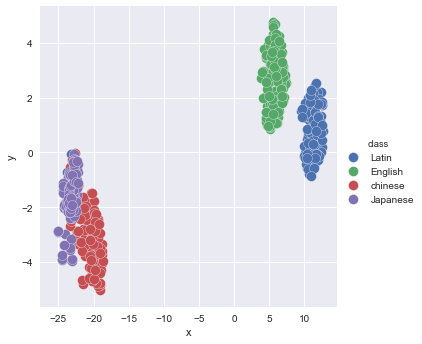

In [25]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=5, plot_kws={"s": 100});
plt.show()

In [82]:
type(sentences)

list

In [89]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(s)

ValueError: setting an array element with a sequence.